In [2]:
%pip install openpyxl appscript psutil xlwings -q

Note: you may need to restart the kernel to use updated packages.


### [Syntax Overview](https://docs.xlwings.org/en/latest/syntax_overview.html)

In [3]:
import xlwings as xw
# Active app (i.e. Excel instance)
app = xw.apps.active
app


<App [excel] 1456>

In [4]:
#!TODO The object you are trying to access does not exist
# Active book
wb = xw.books.active  # in active app
#wb

In [5]:
#TODO The object you are trying to access does not exist
#wb = app.books.active  # in specific app
#wb

In [6]:
#TODO The object you are trying to access does not exist
# Active sheet
#sheet = xw.sheets.active  # in active book
#sheet

In [7]:
# import necessary packages
import numpy as np
import pandas as pd
import xlwings as xw

# path to data we just downloaded
# if you are interested in how modelpoints were created,
# check out the `generating_modelpoints.ipynb` file in the repo
DATA_XLS = "./dstoolkit/model_point.xlsx"

# ingesting our data into a dataframe (df)


# Open workbook in < Interactve Mode >
#new = xw.Book()
wb = xw.Book(DATA_XLS) # connect to a file that is open or in the current working directory

In [8]:
wb

<Book [model_point.xlsx]>

In [9]:
wb.sheets


Sheets([<Sheet [model_point.xlsx]Sheet1>])

### Selecting a named range `model_point` in `wb.sheets[0]`

In [24]:
wb.sheets[0].range('model_point').value

CommandError: Command failed:
		OSERROR: -1728
		MESSAGE: The object you are trying to access does not exist
		COMMAND: app(pid=1456).workbooks['model_point.xlsx'].count(each=k.worksheet)

Get the process id `pid` of the Excel instances open 


In [53]:
xw.apps.keys()

[1456]

In [56]:
wb.sheets

Sheets([<Sheet [model_point.xlsx]Sheet1>])

In [58]:
wb.sheets['Sheet1']

<Sheet [model_point.xlsx]Sheet1>

# `xwings` : `Interactive Mode`

In [41]:
# to list the sheets in the workbook in xlwings
wb.sheets

Sheets([<Sheet [model_point.xlsx]Sheet1>])

In [45]:
# Looking at the values in our newly created workbook
print(wb.sheets[0]["A1"].value)

policy_id


## Modifying Excel Workbook from `python`

In [34]:
# Assigning values to a cell
# Notice the mismatched dimensionality
# Impact is similar to pasting table into a cell in Excel
wb.sheets[0]["A1"].value = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

We obsere, not only does our `pd.DataFrame` expands beyond `"A1"`,`"A1"` is not filled with the `pd.DataFrame` 

However if we assign a  single value to `"A1"` the value of `"A1"` itself is set. Seems to be related to the dimensionality mismatch. Is almost like pasting a table to a cell in Excel.

# `xwings` : `Reader Mode`

In [2]:
# Reader mode: read
import os
os.listdir("cluster")

['cashflows_seriatim_10K.xlsx',
 'generate_model_points_for_cluster.ipynb',
 'PV_shocks.xlsx',
 'BasicTerm_ME_for_Cluster',
 'pv_seriatim_10K_lapse50.xlsx',
 'pv_seriatim_10K.xlsx',
 'cashflows_seriatim_10K_lapse50.xlsx',
 'pv_seriatim_10K_mort15.xlsx',
 'cluster_model_points.ipynb',
 'cashflows_seriatim_10K_mort15.xlsx']

### Loading our data into `xw.sheet` objects?

In [25]:
base = xw.Book('cluster/cashflows_seriatim_10K.xlsx')
base.sheets

Sheets([<Sheet [cashflows_seriatim_10K.xlsx]Sheet1>])

In [26]:
lapse50 = xw.Book('cluster/cashflows_seriatim_10K_lapse50.xlsx')
lapse50.sheets

Sheets([<Sheet [cashflows_seriatim_10K_lapse50.xlsx]Sheet1>])

In [27]:
mort15 = xw.Book('cluster/cashflows_seriatim_10K_mort15.xlsx')
mort15.sheets

Sheets([<Sheet [cashflows_seriatim_10K_mort15.xlsx]Sheet1>])

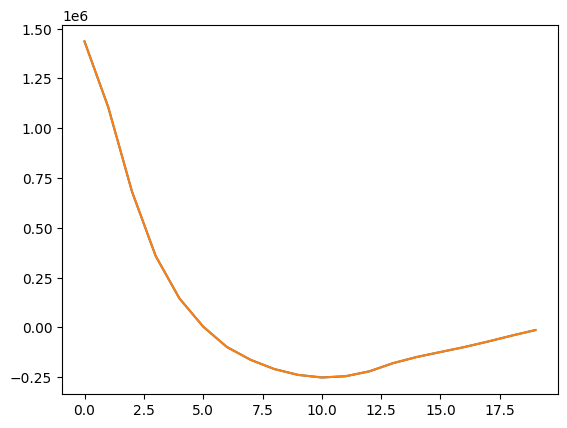

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot( basef.selection(0).options(pd.DataFrame, expand='table').value.sum())
plt.plot( lapse50.selection(0).options(pd.DataFrame, expand='table').value.sum())

### What can one do with a sheet object?

```
for func in list(dir(base)):
    if not func.startswith("_"):
        print("\n" + str(func) + "\n")
        print(getattr(base,func))
```

In [43]:
# How .selection works
for i in [0, 1, -1]:
    print(str(base.selection(i)) + "\n")


<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1>

<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1>

<Range [cashflows_seriatim_10K_mort15.xlsx]Sheet1!$A$1048576>



In [62]:
len(base.selection(0).expand().value)

10001

In [ ]:
len(base.selection(0).expand().value)

### [`TOP-LEVEL FUNCTIONS: view()`](https://docs.xlwings.org/en/stable/api/top_level_functions.html#xlwings.view)

`view()` takes any object and writes it to an Excel table as a new object


> *ℹ️ Only use this in an interactive context like e.g. a Jupyter notebook! Don’t use this in a script as it depends on the active book.*


In [29]:
from xlwings import view
# using `view` we can see how .selection.expand() works
# notice how .expand() selects all adjacent cells
df = pd.DataFrame(data = base.selection(0).expand().value)
view(df)

In [84]:
#If you wanted to reuse the same workbook,
# provide a sheet object
#TODO! This is not working 
#specific_sheet = xw.Book()
#view(df, sheet=specific_sheet)

### [`TOP-LEVEL FUNCTIONS: load()`](https://docs.xlwings.org/en/stable/api/top_level_functions.html#xlwings.load)

Loads the selected cell(s) of the active workbook into a `pd.DataFrame`.

If you select a single cell that has adjacent cells, the range is auto-expanded (via current region) and turned into a `pd.DataFrame`

> *ℹ️ Only use this in an interactive context like e.g. a Jupyter notebook! Don’t use this in a script as it depends on the active book.*

In [99]:
base = xw.Book('cluster/cashflows_seriatim_10K.xlsx')
base_df = xw.load()

In [92]:
lapse50 = xw.Book('cluster/cashflows_seriatim_10K_lapse50.xlsx')
lapse50_df = xw.load()

In [91]:
mort15 = xw.Book('cluster/cashflows_seriatim_10K_mort15.xlsx')
mort15_df = xw.load()

### [`UDF decorators`](https://docs.xlwings.org/en/stable/api/udf_decorators.html)
